<a href="https://colab.research.google.com/github/patel-star/Gen-AI/blob/main/Document_Similarity_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#File Paths --
# /content/drive/MyDrive/GenAI - 2025/DataSets/NLP/test_doc1.txt
# /content/drive/MyDrive/GenAI - 2025/DataSets/NLP/test_doc2.txt

%pip install nltk
%pip install gensim
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def preprocess_text(text):
  text = text.lower() #lower casing of the text
  text = text.translate(str.maketrans('', '', string.punctuation)) # removing punctuations
  tokens = word_tokenize(text) #tokenize the text
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words] #remove stop words
  lemmatizer = WordNetLemmatizer() #get the root forms of the words.
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  #assemble the text
  preprocessed_text = ' '.join(tokens)
  return preprocessed_text , tokens

In [ ]:
with open('/content/drive/MyDrive/GenAI - 2025/DataSets/NLP/test_doc1.txt', 'r') as file:
  doc1_raw = file.read()
  doc1 = preprocess_text(doc1_raw)
with open('/content/drive/MyDrive/GenAI - 2025/DataSets/NLP/test_doc2.txt', 'r') as file:
  doc2_raw = file.read()
  doc2 = preprocess_text(doc2_raw)


In [ ]:
doc2_raw

'\nArtificial intelligence (AI) is transforming various industries, from healthcare to finance. In the realm of healthcare, AI applications analyze medical data to assist in diagnosis and treatment planning. Chatbots powered by AI provide instant support to users, answering queries and guiding them through services.\n\nThe financial sector leverages AI for fraud detection, risk assessment, and personalized recommendations. Machine learning algorithms process vast amounts of data to identify patterns and make predictions, enhancing decision-making processes.\n\nIn the world of e-commerce, AI is used for personalized recommendations, demand forecasting, and improving the overall shopping experience. Virtual assistants powered by AI help users find products, track orders, and receive tailored suggestions.\n\nNatural language processing (NLP) is a key component of AI, enabling machines to understand and generate human-like language. Word embeddings, such as those produced by Word2Vec model

In [ ]:
doc2

'artificial intelligence ai transforming various industry healthcare finance realm healthcare ai application analyze medical data assist diagnosis treatment planning chatbots powered ai provide instant support user answering query guiding service financial sector leverage ai fraud detection risk assessment personalized recommendation machine learning algorithm process vast amount data identify pattern make prediction enhancing decisionmaking process world ecommerce ai used personalized recommendation demand forecasting improving overall shopping experience virtual assistant powered ai help user find product track order receive tailored suggestion natural language processing nlp key component ai enabling machine understand generate humanlike language word embeddings produced word2vec model play crucial role representing word way capture semantic relationship word2vec developed google researcher learns distributed representation word based context representation encode semantic similarit

In [ ]:
doc1

'natural language processing nlp fascinating field involves development algorithm capable understanding interpreting human language nlp application various domain including machine translation sentiment analysis chatbot development quick brown fox jumped lazy dog classic sentence showcase diversity word relationship word like quick brown fox jumped lazy dog contribute overall meaning sentence world technology artificial intelligence ai making significant stride ai system process comprehend natural language enabling interact user humanlike manner word embeddings generated word2vec model play crucial role enhancing ai language understanding capability word2vec developed google researcher powerful technique learning word representation capture semantic relationship word allowing machine understand context similarity trained embeddings used various downstream task including text classification information retrieval recommendation system train word2vec model effectively essential diverse re

In [ ]:
from nltk import wsd
from nltk.corpus import wordnet as wn
from spacy.cli import download
from spacy import load
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nlp = load('en_core_web_sm')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
doc1 , doc1_tokens = preprocess_text(doc1_raw)
doc2 , doc2_tokens = preprocess_text(doc2_raw)

In [ ]:
# Get all sentences in Doc1 and Doc2
sent2 = [word_tokenize(sent) for sent in sent_tokenize(doc2_raw)]
sent1 = [word_tokenize(sent) for sent in sent_tokenize(doc1_raw)]

all_sent = sent1 + sent2

In [ ]:
model = Word2Vec(all_sent, vector_size=2, window = 2, min_count= 1, workers = 10)

In [ ]:
all_embeddings = model.wv.vectors
all_words = model.wv.index_to_key

for word, embedding in zip(all_words, all_embeddings):
  print("Word : ", word, "Embedding: ", embedding)

Word :  , Embedding:  [-0.02080187  0.01033991]
Word :  . Embedding:  [0.25523242 0.44939747]
Word :  and Embedding:  [-0.46181405 -0.35815772]
Word :  the Embedding:  [0.33077613 0.44881755]
Word :  to Embedding:  [-0.24749862 -0.19243848]
Word :  of Embedding:  [ 0.37306774 -0.07920357]
Word :  AI Embedding:  [-0.22189178  0.323188  ]
Word :  a Embedding:  [-0.24036554 -0.09320009]
Word :  language Embedding:  [0.14471869 0.04939089]
Word :  in Embedding:  [-0.41008136 -0.47302467]
Word :  Word2Vec Embedding:  [0.36818904 0.25317022]
Word :  is Embedding:  [0.3398709  0.03487033]
Word :  for Embedding:  [ 0.31912637 -0.1700256 ]
Word :  '' Embedding:  [-0.04403711  0.28747705]
Word :  `` Embedding:  [-0.3737666  -0.19938543]
Word :  by Embedding:  [-0.3749206  -0.04839624]
Word :  model Embedding:  [ 0.4768936 -0.3658697]
Word :  embeddings Embedding:  [-0.11339729 -0.09828244]
Word :  words Embedding:  [ 0.4080155 -0.2996295]
Word :  various Embedding:  [ 0.00307636 -0.23937929]
Wor

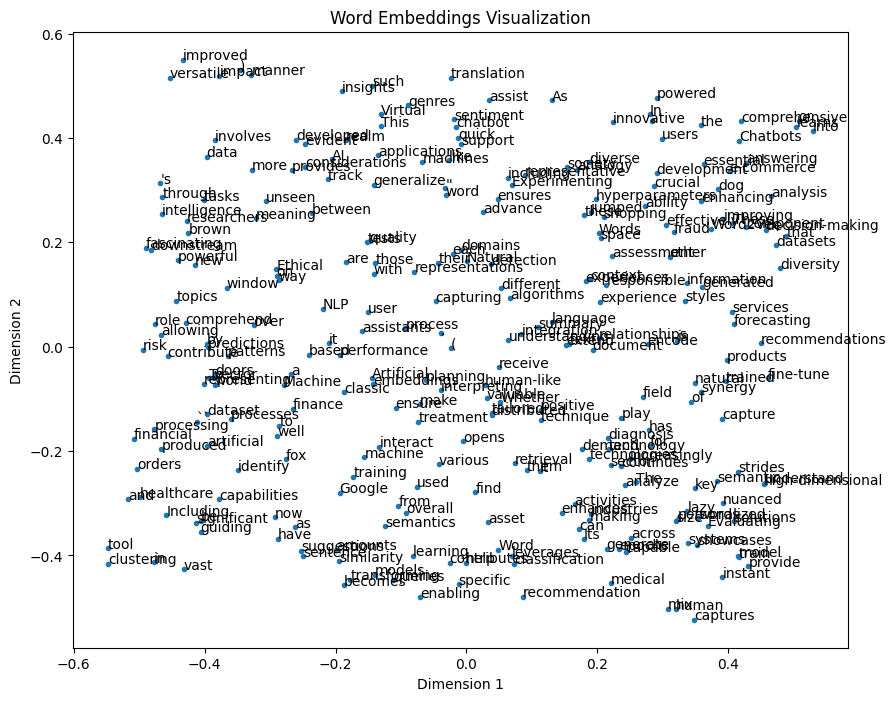

In [ ]:
pca_2d = PCA(n_components=2)
embedding_2d = pca_2d.fit_transform(all_embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], marker = '.')

for i, word in enumerate(all_words):
  plt.annotate(word, (embedding_2d[i, 0], embedding_2d[i, 1]))

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Word Embeddings Visualization')
plt.show()

In [ ]:
words_d1 = [word for word in doc1_tokens if word in model.wv.key_to_index]
embeddings_d1 = np.array([model.wv[word] for word in words_d1])

words_d2 = [word for word in doc2_tokens if word in model.wv.key_to_index]
embeddings_d2 = np.array([model.wv[word] for word in words_d2])

avg_embedding_d1 = np.mean(embeddings_d1, axis=0)
avg_embedding_d2 = np.mean(embeddings_d2, axis=0)

In [ ]:
# Doc1 --> w1, w2, w3, w4
# w1 --> 0.2, 0.3 (0.25)
# w2 --> 0.1, 0.9 (0.50)
# .
# .
# .
# .

#Cosine Similarity = Cosine distance between D1 and D2 (dot product divided by the lengths)
cosine_sim = cosine_similarity(avg_embedding_d1.reshape(1, -1), avg_embedding_d2.reshape(1, -1))[0]
print("Cosine Similarity : ", cosine_sim)

#Euclidean Distance - Distance between the 2 document vectors
euclidean_dist = np.linalg.norm(avg_embedding_d1 - avg_embedding_d2)
print("Euclidean Distance : ", euclidean_dist)

#Jaccard Similarity - A intersection B / A union B where A = unique words in doc A, B = unique words in doc B.
jaccard_sim = len(set(words_d1).intersection(set(words_d2))) / len(set(words_d1).union(set(words_d2)))
print("Jaccard Similarity : ", jaccard_sim)

Cosine Similarity :  [0.95016515]
Euclidean Distance :  0.036268856
Jaccard Similarity :  0.23976608187134502
